### Import libraries

In [2]:
import pandas as pd
from pathlib import Path
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler

### load options

In [22]:
with open("options.txt", 'r') as f:
    options = f.readlines()
    options = {option.split("=")[0]: option.split("=")[1].strip() for option in options}
print(options)

{'hanoi_scenario_dir': 'C:\\Users\\mjnst\\Desktop\\Thesis\\Hanoi_CMH\\Scenario-15', 'RUG_dir': 'C:\\Users\\mjnst\\Desktop\\Thesis\\Data uitwisseling RUG - Sensordata 5+ years'}


### Load csv files from scenario from directory

In [24]:
scenario_dir = options["hanoi_scenario_dir"]
# print(scenario_dir)
# Read each CSV file in dir "path/to/root_dir"

def read_files_dataframe(scenario_dir):
    dfs = []
    for subfolder in ["Demands", "Flows", "Pressures"]:
        for file in Path(scenario_dir).glob(f"{subfolder}/*.csv"):
            dfs.append(pd.read_csv(file, index_col=0, header=0, names=["Index", f"{subfolder}_{file.stem}"]))
    return pd.concat(dfs, axis=1)

# Put the dataframes to a single dataframe
# df = pd.concat(dfs, axis=1)
# print(dfs)
df = read_files_dataframe(scenario_dir)
df

,Demands_Node_1,Demands_Node_10,Demands_Node_11,Demands_Node_12,Demands_Node_13,Demands_Node_14,Demands_Node_15,Demands_Node_16,Demands_Node_17,Demands_Node_18,...,Pressures_Node_3,Pressures_Node_30,Pressures_Node_31,Pressures_Node_32,Pressures_Node_4,Pressures_Node_5,Pressures_Node_6,Pressures_Node_7,Pressures_Node_8,Pressures_Node_9
Index,,,,,,,,,,,,,,,,,,,,,
1,-3236.4,86.4,104.4,97.2,151.2,93.6,46.8,64.8,194.4,201.6,...,68.797,67.556,67.595,67.673,68.647,68.559,68.336,68.254,68.216,68.188
2,-2880.0,79.2,90.0,90.0,115.2,82.8,39.6,57.6,158.4,183.6,...,69.033,68.022,68.062,68.134,68.914,68.844,68.666,68.601,68.571,68.550
3,-2563.2,79.2,79.2,90.0,108.0,72.0,32.4,50.4,140.4,147.6,...,69.221,68.411,68.439,68.490,69.123,69.065,68.917,68.862,68.837,68.819
4,-2347.2,79.2,79.2,79.2,90.0,61.2,32.4,43.2,140.4,136.8,...,69.336,68.629,68.653,68.697,69.256,69.209,69.093,69.048,69.027,69.011
5,-2174.4,72.0,68.4,68.4,79.2,64.8,28.8,50.4,129.6,133.2,...,69.423,68.805,68.825,68.863,69.356,69.316,69.214,69.174,69.157,69.143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17516,-5497.2,154.8,151.2,190.8,219.6,151.2,82.8,104.4,262.8,370.8,...,66.800,63.671,63.780,63.983,66.395,66.155,65.554,65.341,65.249,65.179
17517,-5079.6,147.6,144.0,180.0,212.4,144.0,82.8,97.2,270.0,324.0,...,67.239,64.581,64.681,64.860,66.888,66.681,66.147,65.960,65.874,65.811
17518,-4798.8,140.4,144.0,147.6,198.0,122.4,68.4,86.4,252.0,280.8,...,67.507,65.015,65.091,65.233,67.202,67.023,66.570,66.414,66.342,66.288


In [12]:
def read_files_scaled(scenario_dir):
    dfs = []
    for subfolder in ["Demands", "Flows", "Pressures"]:
        dfs_temp = []
        for file in Path(scenario_dir).glob(f"{subfolder}/*.csv"):
            dfs_temp.append(pd.read_csv(file, index_col=0, header=0, names=["Index", f"{subfolder}_{file.stem}"]))
        dfs_temp_trans = pd.concat(dfs_temp, axis=1)

        scaler = StandardScaler()
        scaler.fit(dfs_temp_trans)
        dfs.append(scaler.transform(dfs_temp_trans))

    return np.concatenate(dfs, axis=1)
data_scaled = read_files_scaled(scenario_dir)
data_scaled

array([[ 1.322159  , -1.54970442, -1.24156014, ...,  1.21858962,
         1.22101918,  1.22292807],
       [ 1.49763079, -1.70519583, -1.55094251, ...,  1.32917575,
         1.33256579,  1.33548392],
       [ 1.65360571, -1.70519583, -1.7829793 , ...,  1.41235437,
         1.41614719,  1.41912349],
       ...,
       [ 0.55291904, -0.38351885, -0.3907586 , ...,  0.63219628,
         0.63217878,  0.63216531],
       [ 0.76206723, -0.84999308, -0.62279538, ...,  0.79982829,
         0.79934158,  0.79944445],
       [ 0.98007764, -1.16097589, -0.93217776, ...,  0.98530705,
         0.98629998,  0.98724482]])

<AxesSubplot: xlabel='Index'>

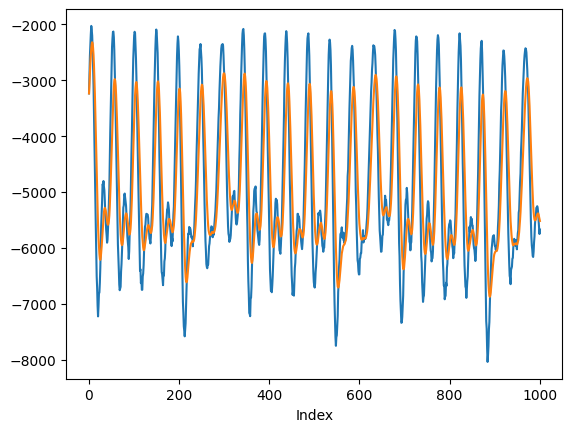

In [13]:
# df.Demands_Node_1.iloc[:1000].plot()
ax = df.Demands_Node_1.iloc[:1000].plot()
df.Demands_Node_1.iloc[:1000].ewm(span=12).mean().plot(ax=ax)

### Check for any NaN values

In [24]:
# for i in dfs:
#     if i.isna().any():
#         display(i)

In [14]:
df.isna().any().value_counts()


False    98
dtype: int64

In [15]:
pca = PCA(30)
pca_features = pca.fit_transform(df)
print('Shape before PCA: ', df.shape)
print('Shape after PCA: ', pca_features.shape)

Shape before PCA:  (17520, 98)
Shape after PCA:  (17520, 30)


In [16]:
for i in sorted(list(pca.explained_variance_), reverse=True)[:10]:
    print(i)

14314227.463501263
594742.7128413022
3510.9642721773507
1330.7942004392091
1114.877467077922
1046.6927321364185
640.4774290350946
550.7492054041105
434.8450835925842
377.3109177612604


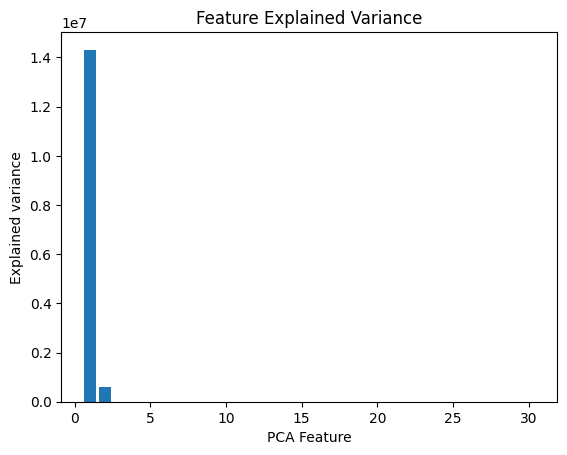

In [17]:
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()